In [37]:
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')




In [38]:
df = pd.read_csv('C:\projects\Electric-Motor-Temperature-Prediction-Using-Machine-Learning\measures_v2.csv')
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [39]:
df.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='str')

In [40]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [41]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


<Axes: xlabel='profile_id'>

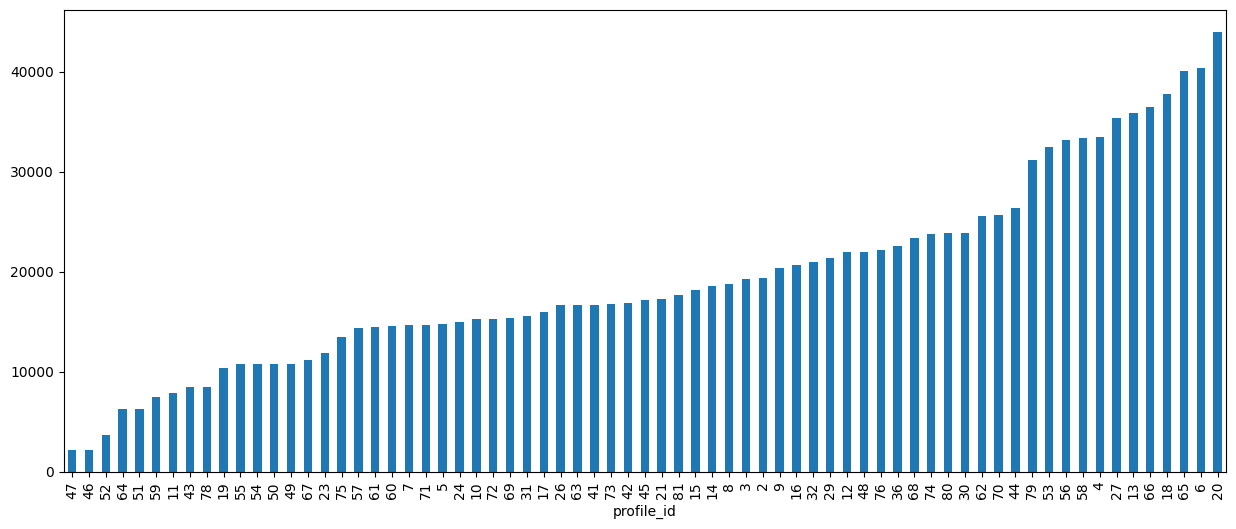

In [42]:
plt.figure(figsize=(15,6))
df['profile_id'].value_counts().sort_values().plot(kind='bar')

<Axes: xlabel='i_q', ylabel='pm'>

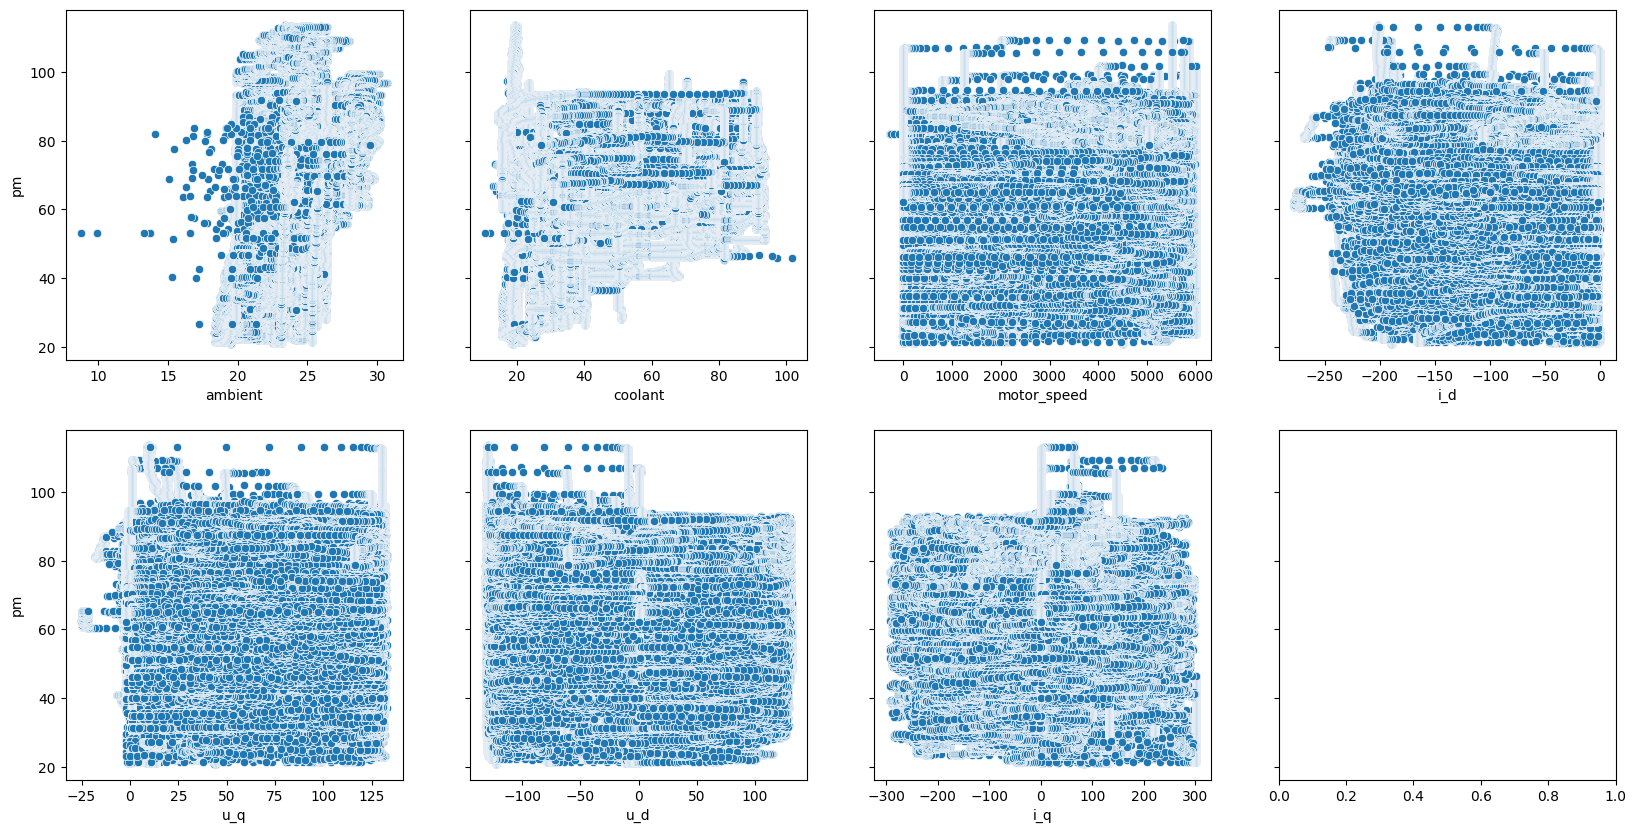

In [43]:
fig, axes = plt.subplots(2, 4, figsize=(20,10), sharey = True)
sns.scatterplot(x = 'ambient', y = 'pm', data = df, ax = axes[0][0])
sns.scatterplot(x = 'coolant', y = 'pm', data = df, ax = axes[0][1])
sns.scatterplot(x = 'motor_speed', y = 'pm', data = df, ax = axes[0][2])
sns.scatterplot(x = 'i_d', y = 'pm', data = df, ax = axes[0][3])
sns.scatterplot(x = 'u_q', y = 'pm', data = df, ax = axes[1][0])
sns.scatterplot(x = 'u_d', y = 'pm', data = df, ax = axes[1][1])
sns.scatterplot(x = 'i_q', y = 'pm', data = df, ax = axes[1][2]) 

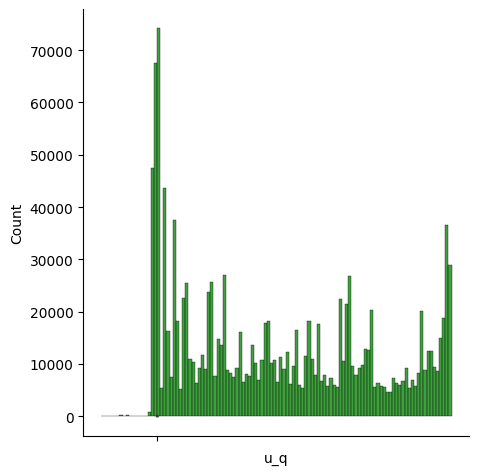

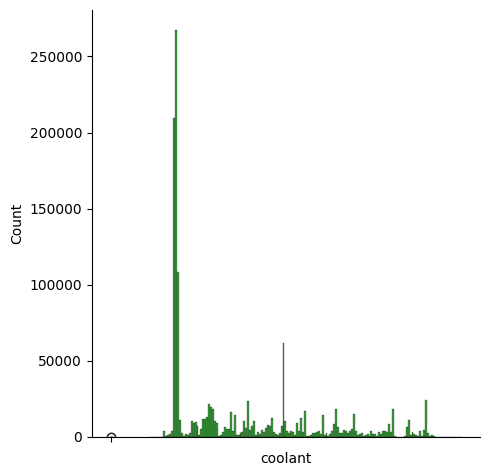

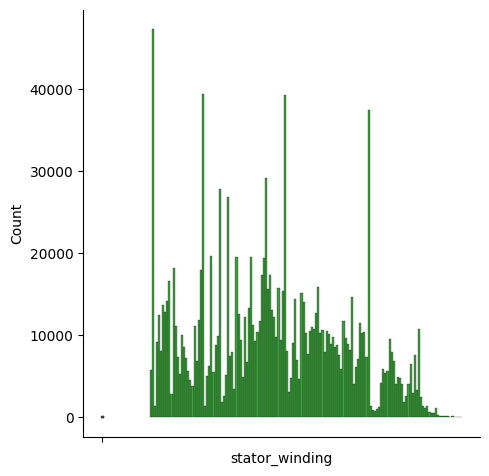

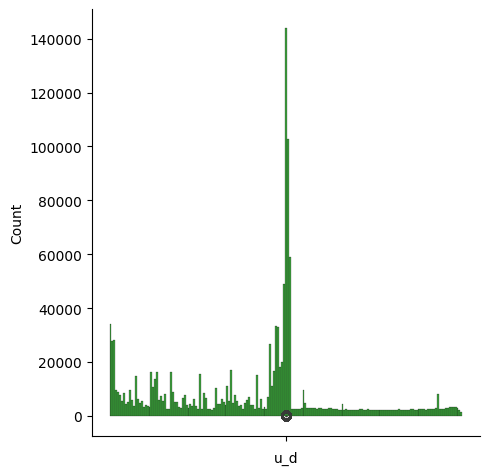

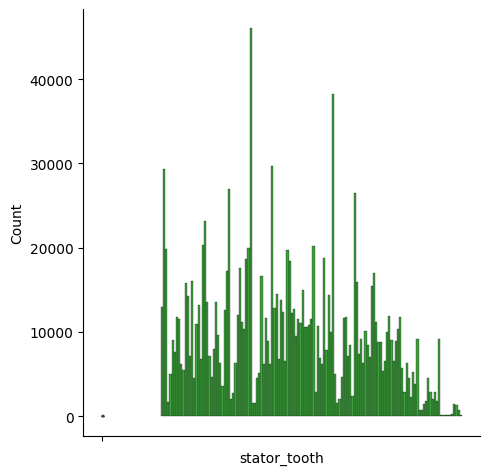

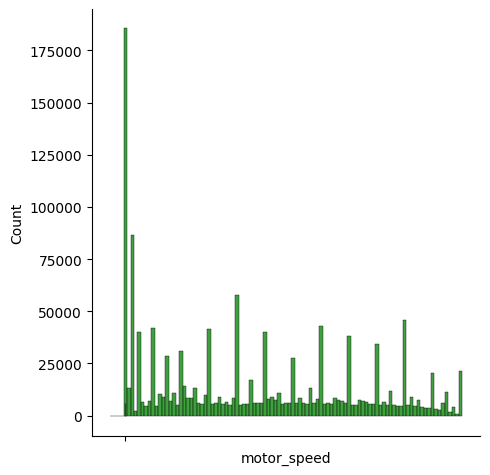

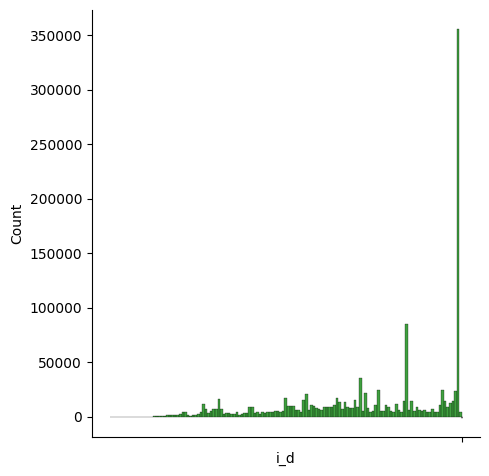

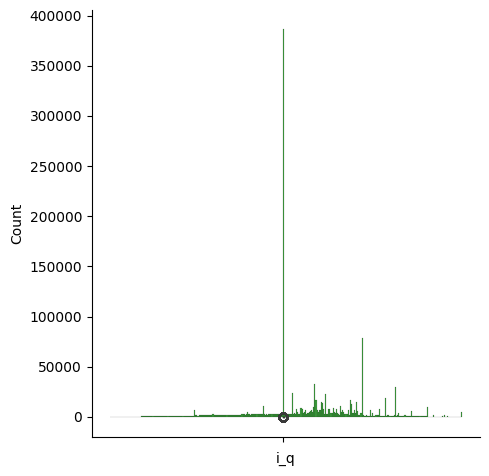

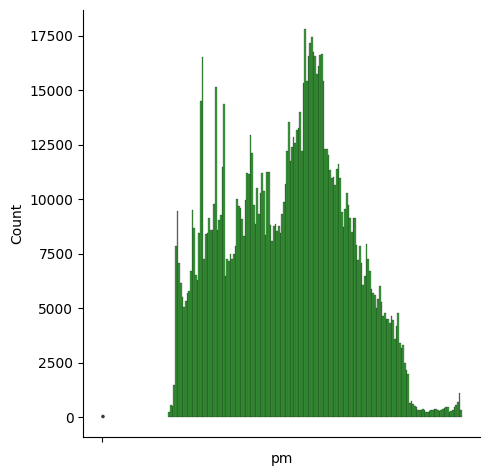

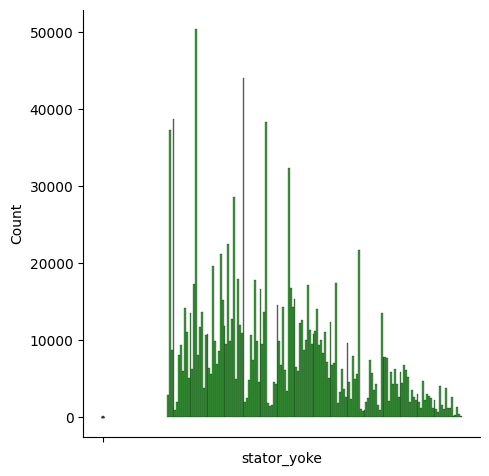

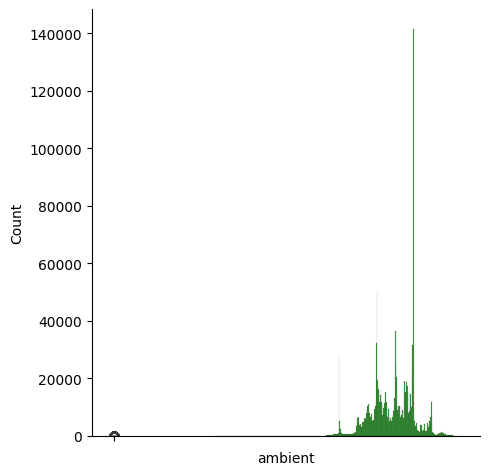

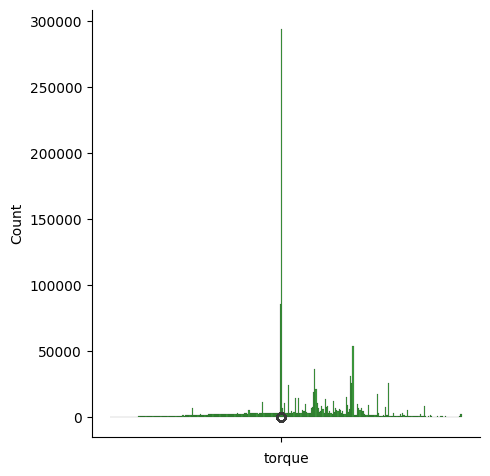

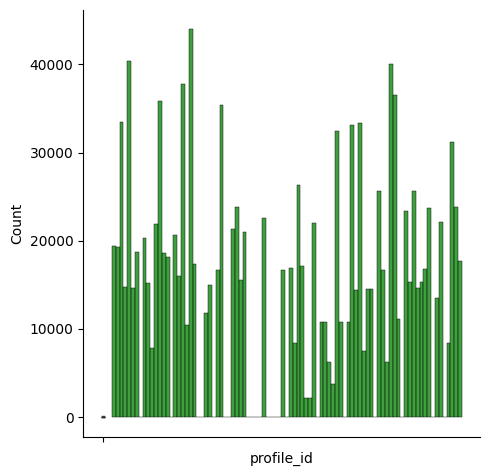

In [44]:
# plotting distrubution and boxplot for features to check for skewness and outliers
for i in df.columns:
    sns.displot(df[i], color = 'g')
    sns.boxplot(df[i], color = 'y')
    plt.vlines(df[i].mean(), ymin = -1, ymax= 1, color = 'r')
    plt.show()
   
    
    

<Axes: >

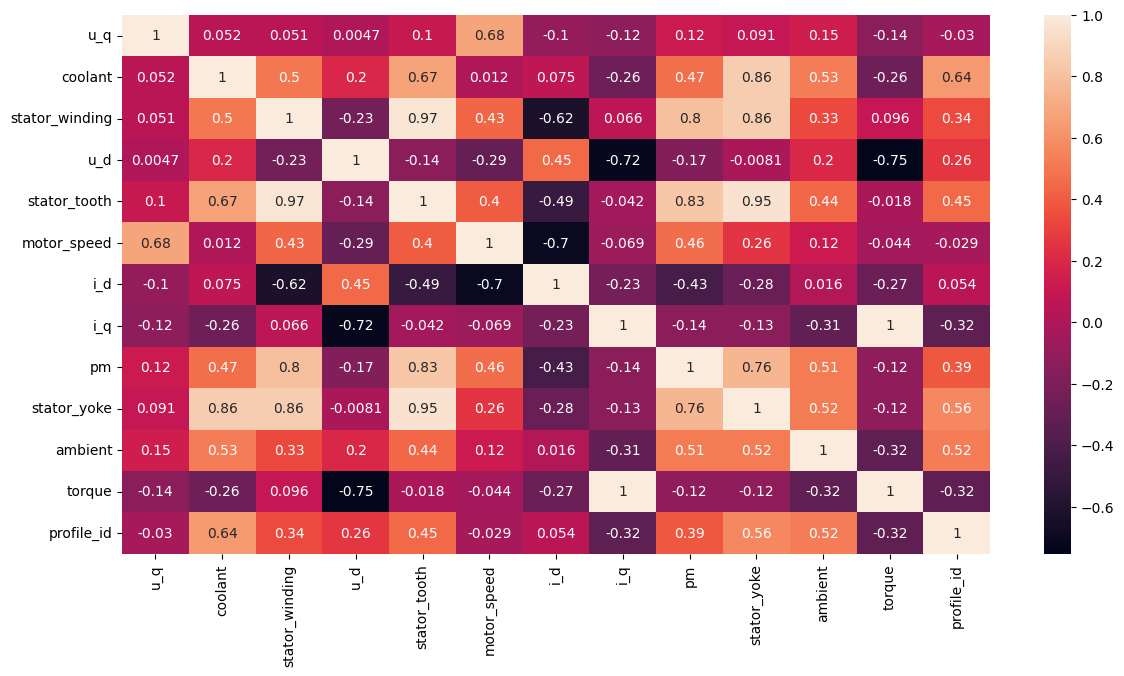

In [45]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot =True)

for a random measurement we can try to compare the temperatures of 3 stator components

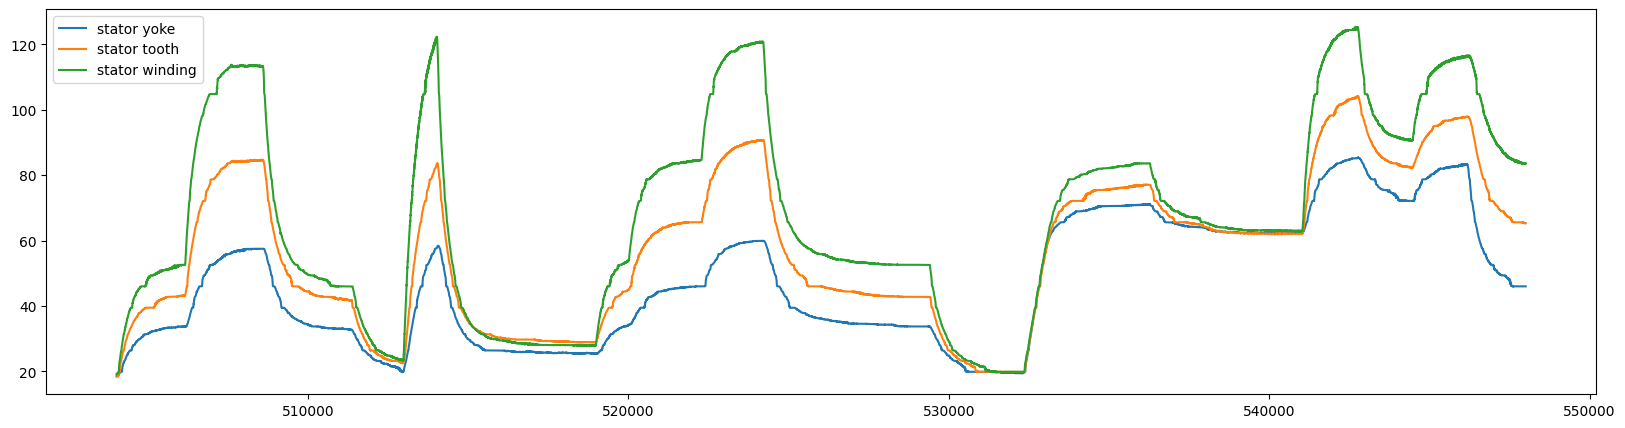

In [46]:
plt.figure(figsize=(20,5))
df[df['profile_id'] == 20]['stator_yoke'].plot(label = 'stator yoke')
df[df['profile_id'] == 20]['stator_tooth'].plot(label = 'stator tooth')
df[df['profile_id'] == 20]['stator_winding'].plot(label = 'stator winding')
plt.legend()

In [47]:
df.drop(['profile_id'], axis = 1, inplace = True)
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197


In [48]:
#droppin unwanted features
df.drop(['stator_yoke', 'stator_tooth', 'stator_winding', 'torque'], axis=1, inplace = True)
df.columns

Index(['u_q', 'coolant', 'u_d', 'motor_speed', 'i_d', 'i_q', 'pm', 'ambient'], dtype='str')

In [49]:
df.isnull().sum()

u_q            0
coolant        0
u_d            0
motor_speed    0
i_d            0
i_q            0
pm             0
ambient        0
dtype: int64

In [50]:
X = df.drop(['pm'], axis = 1)
y = df['pm']    


In [51]:
X.info()

<class 'pandas.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   u_q          1330816 non-null  float64
 1   coolant      1330816 non-null  float64
 2   u_d          1330816 non-null  float64
 3   motor_speed  1330816 non-null  float64
 4   i_d          1330816 non-null  float64
 5   i_q          1330816 non-null  float64
 6   ambient      1330816 non-null  float64
dtypes: float64(7)
memory usage: 71.1 MB


In [52]:
X.head()

,u_q,coolant,u_d,motor_speed,i_d,i_q,ambient
0,-0.450682,18.805172,-0.350055,0.002866,0.004419,0.000328,19.850691
1,-0.325737,18.818571,-0.305803,0.000257,0.000606,-0.000785,19.850672
2,-0.440864,18.828770,-0.372503,0.002355,0.001290,0.000386,19.850657
3,-0.327026,18.835567,-0.316199,0.006105,0.000026,0.002046,19.850647
4,-0.471150,18.857033,-0.332272,0.003133,-0.064317,0.037184,19.850639


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

num_rows = len(X)
sample_size = int(num_rows * 0.1)
indices = np.random.choice(num_rows, sample_size, replace=False)

X_sample = X.iloc[indices]
y_sample = y.iloc[indices]

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

mm = MinMaxScaler()
X_train = mm.fit_transform(X_train_raw)
X_test = mm.transform(X_test_raw)

joblib.dump(mm, 'transformer.save')


print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (106464, 7)
y_train shape: (106464,)
X_test shape: (26617, 7)
y_test shape: (26617,)


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
svm = SVR()

In [61]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.The penalty is a squared l2. For an intuitive visualization of theeffects of scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-SVR model. It specifies the epsilon-tubewithin which no penalty is associated in the training loss functionwith points predicted within a distance epsilon from the actualvalue. Must be non-negative.",0.1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


In [62]:
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [63]:
models = {'linear_regression': (y_pred_lr, lr),
          'decision_tree': (y_pred_dt, dt),
          'random_forest': (y_pred_rf, rf),
          'svm': (y_pred_svm, svm)}

best_model = None
best_r2 = -np.inf
best_name = None          

In [65]:
print("Evaluation Results:")
for name, (y_pred, model) in models.items():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²: {r2:.4f}")
    print("-"*20)

    
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_name = name

Evaluation Results:
linear_regression:
  MSE: 143.5551
  RMSE: 11.9814
  R²: 0.6049
--------------------
decision_tree:
  MSE: 19.4520
  RMSE: 4.4104
  R²: 0.9465
--------------------
random_forest:
  MSE: 9.3116
  RMSE: 3.0515
  R²: 0.9744
--------------------
svm:
  MSE: 94.9881
  RMSE: 9.7462
  R²: 0.7385
--------------------


In [66]:
if best_model:
    joblib.dump(best_model, f'{best_name}_model.save')
    print(f"Best model '{best_name}' saved successfully.")

Best model 'random_forest' saved successfully.
